In [7]:
import pandas as pd
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
df.shape
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [10]:
df.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [11]:
df.sample(5)

,Unnamed: 0,headline,url,publisher,date,stock
694776,698326,GM Sells Steering Biz to China - Analyst Blog,https://www.benzinga.com/10/11/653409/gm-sells...,Zacks,2010-11-30 00:00:00,JCI
785852,789803,"Earnings Scheduled For July 26, 2013",https://www.benzinga.com/news/earnings/13/07/3...,Monica Gerson,2013-07-26 00:00:00,LYB
1089305,1094733,"Stocks Which Set New 52-Week Low Yesterday, Oc...",https://www.benzinga.com/trading-ideas/technic...,Benzinga Newsdesk,2018-10-04 00:00:00,RMCF
383175,385250,Stocks That Hit 52-Week Lows On Wednesday,https://www.benzinga.com/news/20/02/15418319/s...,Lisa Levin,2020-02-26 00:00:00,DSX
1089167,1094594,"Stock Market Ideas for Monday, January 31",https://www.benzinga.com/11/01/873838/stock-ma...,António Costa,2011-01-30 00:00:00,RMBS


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



In [13]:
df['headline_length'] = df['headline'].apply(lambda x: len(str(x).split()))

df['headline_length'].describe()


count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length, dtype: float64

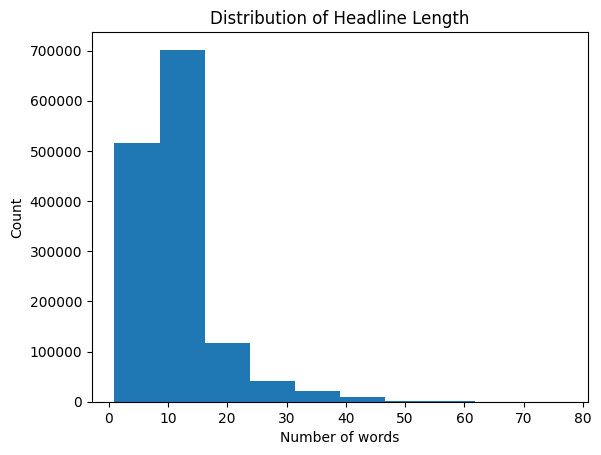

In [14]:
plt.hist(df['headline_length'])
plt.title("Distribution of Headline Length")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.show()


In [18]:
publisher_counts = df['publisher'].value_counts()

publisher_counts.head(10)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

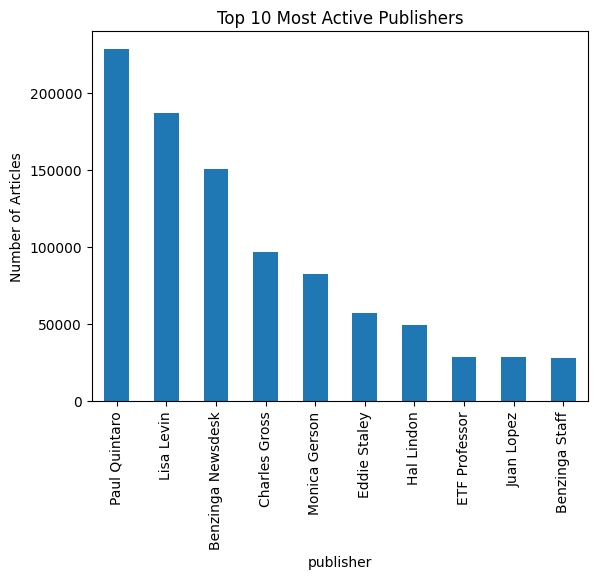

In [16]:
publisher_counts.head(10).plot(kind='bar')
plt.title("Top 10 Most Active Publishers")
plt.ylabel("Number of Articles")
plt.show()


In [26]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
invalid = df[df['date'].isna()]
invalid


# df['date'].head(20)




,Unnamed: 0,headline,url,publisher,date,stock,length,headline_length
10,10,30 Stocks Moving in Friday's Pre-Market Session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,NaT,A,47,7
11,11,SVB Leerink Maintains Outperform on Agilent Te...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,NaT,A,84,12
12,12,8 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,NaT,A,49,7
13,13,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,NaT,A,120,16
14,14,Agilent Technologies Q2 Adj. EPS $0.71 Beats $...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,NaT,A,94,14
...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaT,ZX,38,7
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaT,ZX,52,7
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaT,ZX,56,8
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaT,ZX,54,8


In [27]:
from collections import Counter
import re

def extract_words(text):
    words = re.findall(r'\b[a-zA-Z]+\b', str(text).lower())
    return words

all_words = []

for h in df['headline']:
    all_words.extend(extract_words(h))

word_counts = Counter(all_words).most_common(20)
word_counts


[('to', 404127),
 ('of', 270981),
 ('on', 245970),
 ('for', 239917),
 ('s', 239752),
 ('in', 223581),
 ('the', 213218),
 ('vs', 162099),
 ('stocks', 161776),
 ('est', 140604),
 ('eps', 128897),
 ('from', 120805),
 ('market', 120558),
 ('shares', 114313),
 ('and', 113924),
 ('reports', 108710),
 ('update', 91723),
 ('earnings', 87399),
 ('a', 85774),
 ('with', 84257)]

In [29]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thewoman/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words("english"))

def clean_and_extract_words(text):
    # keep only letters
    words = re.findall(r'\b[a-zA-Z]+\b', str(text).lower())
    # remove stopwords
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words


In [31]:
all_words = []

for h in df['headline']:
    all_words.extend(clean_and_extract_words(h))


In [32]:
from collections import Counter

word_counts = Counter(all_words).most_common(20)
word_counts


[('vs', 162099),
 ('stocks', 161776),
 ('est', 140604),
 ('eps', 128897),
 ('market', 120558),
 ('shares', 114313),
 ('reports', 108710),
 ('update', 91723),
 ('earnings', 87399),
 ('sales', 79645),
 ('top', 79632),
 ('benzinga', 74516),
 ('pt', 73068),
 ('week', 69572),
 ('announces', 66591),
 ('price', 64407),
 ('buy', 64371),
 ('mid', 62263),
 ('downgrades', 61959),
 ('trading', 61182)]

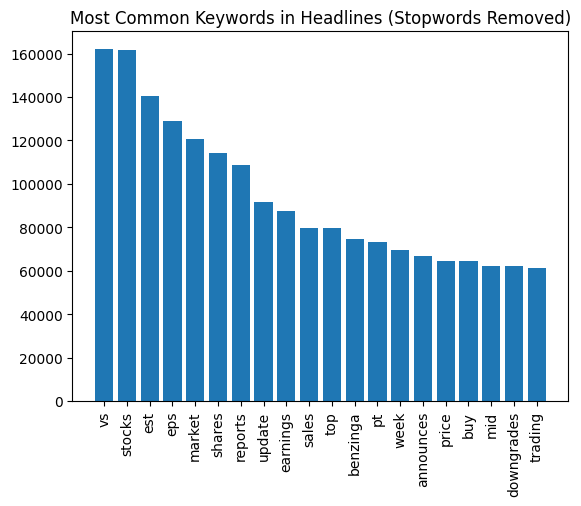

In [33]:
words, counts = zip(*word_counts)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Most Common Keywords in Headlines (Stopwords Removed)")
plt.show()
